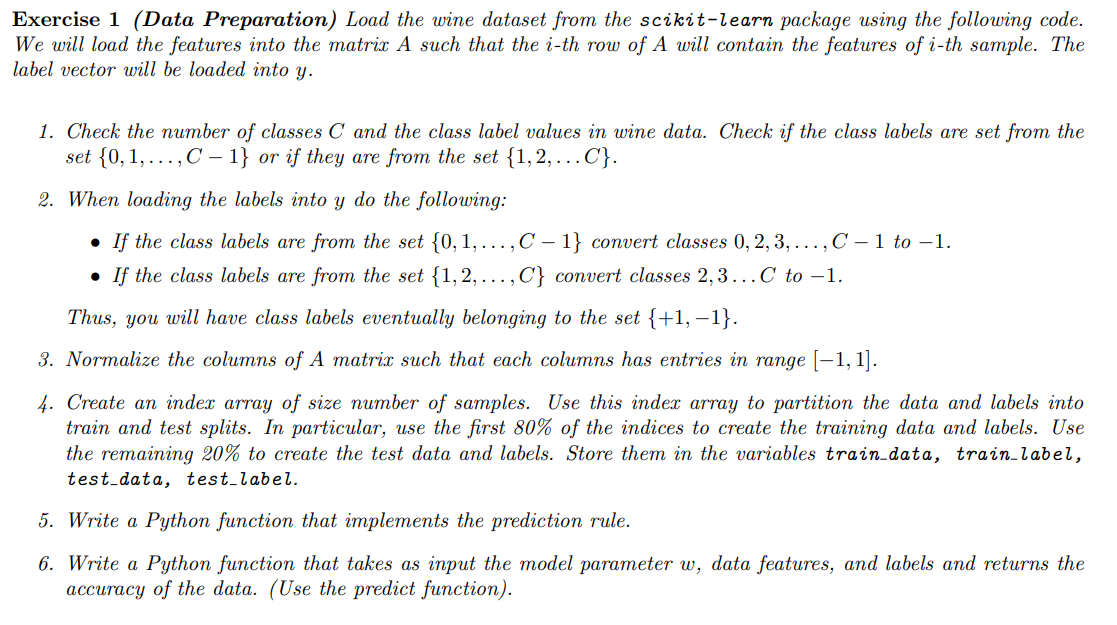

In [2]:
import numpy as np
from sklearn.datasets import load_wine

# Load the wine data
wine = load_wine()

# Check the shape of wine data
print(wine.data.shape)
A = wine.data

# Check the shape of wine target
print(wine.target.shape)

# Number of classes
C = len(np.unique(wine.target))
print(C)

(178, 13)
(178,)
3


In [3]:
normalized_A = np.zeros_like(A)
for i in range(A.shape[1]):

     normalized_A[:,i] = (A[:,i])/max(abs(A[:,i]))



In [4]:
normalized_A

array([[0.95954147, 0.29482759, 0.75232198, ..., 0.60818713, 0.98      ,
        0.63392857],
       [0.89008766, 0.30689655, 0.6625387 , ..., 0.61403509, 0.85      ,
        0.625     ],
       [0.88739042, 0.40689655, 0.82662539, ..., 0.60233918, 0.7925    ,
        0.70535714],
       ...,
       [0.89480782, 0.73793103, 0.6996904 , ..., 0.34502924, 0.39      ,
        0.49702381],
       [0.88806473, 0.44655172, 0.73374613, ..., 0.35087719, 0.405     ,
        0.5       ],
       [0.95279838, 0.70689655, 0.84829721, ..., 0.35672515, 0.4       ,
        0.33333333]])

In [5]:
n = wine.data.shape[0]  # Number of data points
d = wine.data.shape[1]  # Dimension of data points

# Create a nx1 vector of target labels
y = 1.0 * np.ones([A.shape[0], ])
for i in range(wine.target.shape[0]):
    y[i] = -1 if wine.target[i] != 1 else 1

# Create an index array
indexarr = np.arange(n)  # index array
np.random.shuffle(indexarr)  # shuffle the indices

# Use the first 80% of indexarr to create the train data and the remaining 20% to create the test data
train_size = int(0.8*n)

train_data = normalized_A[indexarr[:train_size]]
train_label = y[indexarr[:train_size]]
test_data = normalized_A[indexarr[train_size:]]
test_label = y[indexarr[train_size:]]

print("Train data shape:", train_data.shape)
print("Train label shape:", train_label.shape)
print("Test data shape:", test_data.shape)
print("Test label shape:", test_label.shape)

Train data shape: (142, 13)
Train label shape: (142,)
Test data shape: (36, 13)
Test label shape: (36,)


In [ ]:
# Prediction rule
def predict(w, X):
    return np.sign(np.dot(X, w))

# Calculate accuracy
def calculate_accuracy(w, X, y):
    predictions = predict(w, X)
    correct = (predictions == y).sum()
    total = len(y)
    return correct / total